## Ejercicio: Modelación psicométrica de factores utilizando análisis factorial.


* Para este ejercicio utilizaremos un subconjunto de 25 items de la _International Personality Item Pool_, aplicados a 2800 individuos. El objetivo de esta información es desarrollar perfiles de personalidad en base a una serie de oraciones asociadas a las características _Amabilidad_, _Escrupolisidad_, _Extroversión_, _Neuroticismo_, _Apertura_ Los individuos deben responder qué tan adecuada es la oración respecto a su personalidad en base a 6 categorías:

    - 1: No me representa para nada.
    - 2: No me representa.
    - 3: Algunas cosas no me representan.
    - 4: Algunas cosas me representan.
    - 5: Me representa.
    - 6: Me representa completamente.


* Las 25 preguntas son:
    * `A1`  Soy indiferente a los sentimientos de otros.
    * `A2` Me preocupo del bienestar de otros. 
    * `A3` Sé cómo confortar a otros.
    * `A4` Me agradan los niños. 
    * `A5` Hago sentir tranquila a la gente. 
    * `C1` Soy exacto en mi trabajo.
    * `C2` Sigo con mis tareas hasta que todo esté perfecto.
    * `C3` Hago cosas siguiendo un plan.
    * `C4` Hago cosas con el mínimo esfuerzo.
    * `C5` Pierdo mi tiempo. 
    * `E1` No hablo mucho con las personas.
    * `E2` Me es dificil acercarme a otros.
    * `E3` Sé cómo cautivar gente.
    * `E4` Hago amigos de forma fácil. 
    * `E5` Puedo tomar el cargo de las cosas. 
    * `N1` Me enojo con facilidad.
    * `N2` Me irrito con facilidad.
    * `N3` Tengo cambios de humor frecuentes.
    * `N4` Usualmente me siento melancólico. 
    * `N5` Entro en pánico con facilidad. 
    * `O1` Estoy lleno de ideas.
    * `O2` Evito leer material difícil.
    * `O3` Tiendo a llevar la conversación a niveles más altos.
    * `O4` Dedico tiempo a la reflexión de cosas. 
    * `O5` No profundizaré sobre una materia específica. 
    
* Se registraron una serie de covariables sobre características demográficas de los encuestados:
    * `gender` Hombre = 1, Mujer =2.
    * `education` 1 = Educación Media Incompleta, 2 = Educación Media Completa, 3 = Educación Universitaria Incompleta, 4 = Educación Universitaria Completa 5 = Estudios de Postgrado.
    * `age` Edad en Años.
    
* Implementaremos un modelo de extracción factorial para identificar los principales perfiles psicológicos.

###  1. Lectura de archivos.

* Importe las librerías necesarias para el análisis factorial siguiendo las convenciones.
* Importe la base de datos `bfi.csv` y asígnela a un objeto `df`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use('seaborn')

import factor_analyzer as fact
import missingno as msngo

In [2]:
df = pd.read_csv('bfi.csv')
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [3]:
df.shape

(2800, 29)

### 2. Preprocesamiento.

* Elimine las columnas redundantes de la base, tal como `'Unnamed: 0'`.
* Analice el patrón de datos perdidos con `missingno`. Comente cuáles son las principales variables con mayores tasas de valores perdidos.
* Genere un nuevo objeto donde almacenará la base sin valores perdidos.

#### Eliminación columnas redundantes

In [4]:
df=df.drop(columns='Unnamed: 0')
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


#### Análisis del patrón de datos perdidos con missingo

<Figure size 288x288 with 0 Axes>

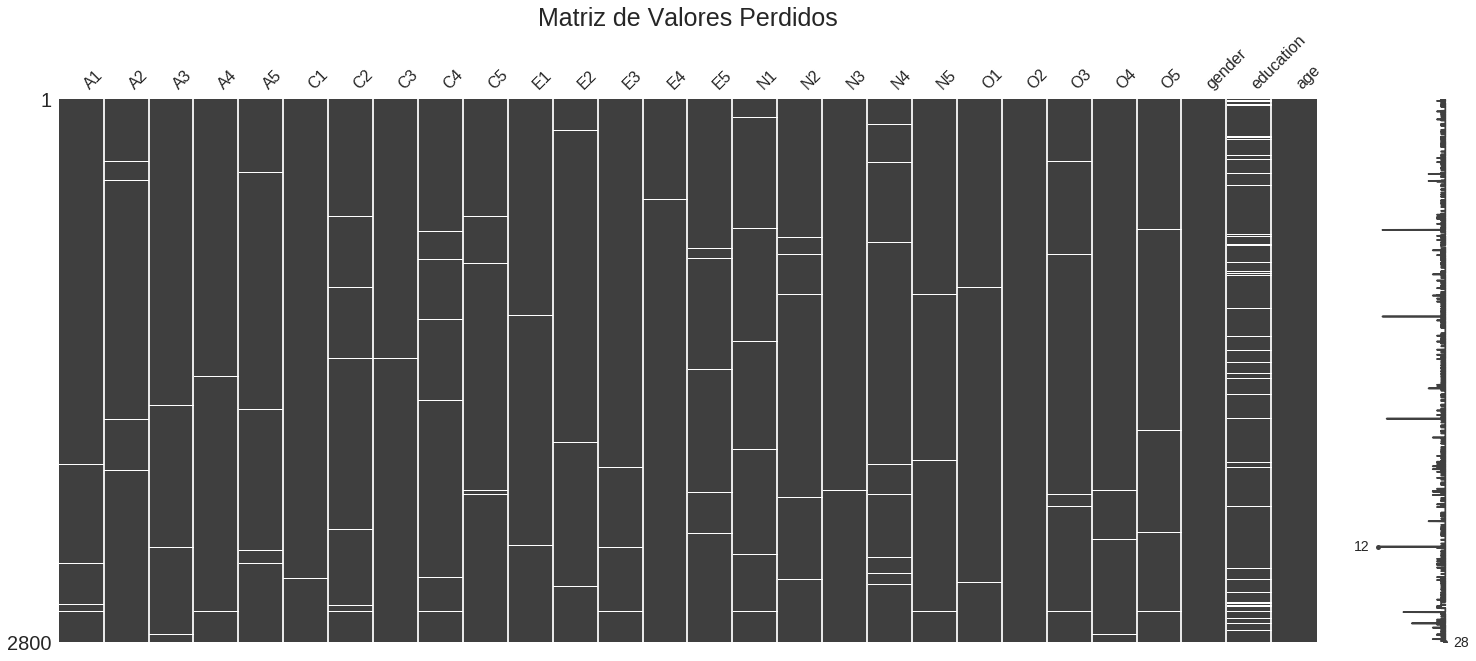

In [5]:
plt.figure(figsize=(4,4))
msngo.matrix(df)
plt.title('Matriz de Valores Perdidos', fontsize=25)
plt.show()

Las variables con mayores tasas de valores perdidos son:
- education
- N4:Usualmente me siento melancólico.
- N5:Entro en pánico con facilidad.


In [6]:
def obs_perdidas(dataframe):
    tmp_colnames=[]
    tmp_na_count=[]
    tmp_porc=[]
    for colnames, serie in dataframe.iteritems():
        cant=serie.isna().value_counts().get(True)
        porc=serie.isna().value_counts('%').get(True)
        if cant is not None:
            tmp_colnames.append(colnames)
            tmp_na_count.append(cant)
            tmp_porc.append(round(porc*100,2))
            
    tmp_dataframe = pd.DataFrame(
                {'var': tmp_colnames,
                'perdidos': tmp_na_count,
                'porcentaje': tmp_porc})
    return tmp_dataframe.sort_values(by='perdidos', ascending=False)


In [7]:
obs_perdidas(df)

,var,perdidos,porcentaje
24,education,223,7.96
18,N4,36,1.29
19,N5,29,1.04
21,O3,28,1.00
1,A2,27,0.96
8,C4,26,0.93
2,A3,26,0.93
12,E3,25,0.89
6,C2,24,0.86
10,E1,23,0.82


#### Nuevo dataframe sin valores perdidos.

In [8]:
df_na=df.dropna().reset_index(drop=True)

In [9]:
df_na.shape

(2236, 28)

### 3. Análisis batería de preguntas.

* Separe en un nuevo objeto `DataFrame` la batería de preguntas a extraer.
* Reporte las medias para cada uno de las preguntas de la batería. Esto lo puede lograr con un dotplot.
* Genere una matriz de correlaciones con este nuevo objeto. Visualícelo con `heatmap`. Comente sobre los principales patrones de correlación entre las preguntas de la batería.

#### Nuevo DataFrame con la batería de preguntas a extraer.

In [10]:
df_na.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5', 'gender', 'education', 'age'],
      dtype='object')

In [11]:
df_factores=df_na.loc[:,'A1':'O5']

In [12]:
df_factores.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,3.0,5.0,2.0,2.0,3.0,4.0,3,5.0,6.0,1.0
1,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,6.0,3.0,2.0,6.0,4.0,3.0,2,4.0,5.0,3.0
2,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,3.0,3.0,4.0,2.0,3.0,5.0,3,5.0,6.0,3.0
3,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,...,2.0,4.0,2.0,2.0,3.0,5.0,2,5.0,5.0,5.0
4,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,...,2.0,2.0,2.0,2.0,2.0,6.0,1,5.0,5.0,2.0


#### Nuevo DataFrame con características demográficas.

In [13]:
df_demo=df_na.loc[:,'gender':]

In [14]:
df_demo.head()

,gender,education,age
0,2,3.0,21
1,1,2.0,19
2,1,1.0,21
3,1,1.0,17
4,1,5.0,68


#### Reporte de las medias de las preguntas de la batería.

In [15]:
def media_variables_df(dataframe):
    tmp_colnames=[]
    tmp_mean=[]
    for colnames, serie in dataframe.iteritems():
        tmp_colnames.append(colnames)
        tmp_mean.append(serie.mean())

    tmp_dataframe = pd.DataFrame(
                {'var': tmp_colnames,
                'media': tmp_mean})
    return tmp_dataframe.sort_values(by='media', ascending=True)

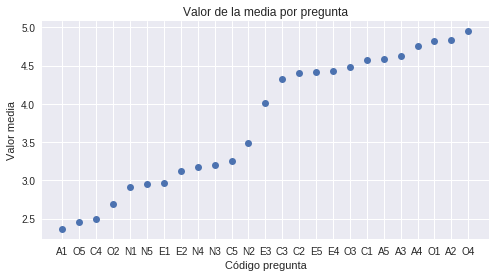

In [16]:
df1=media_variables_df(df_factores)
plt.figure(figsize=(8,4))
plt.plot( df1['var'],df1['media'],'o')
plt.title('Valor de la media por pregunta')
plt.xlabel('Código pregunta')
plt.ylabel('Valor media')
plt.show()

####  Matriz de correlaciones (visualízación con heatmap)

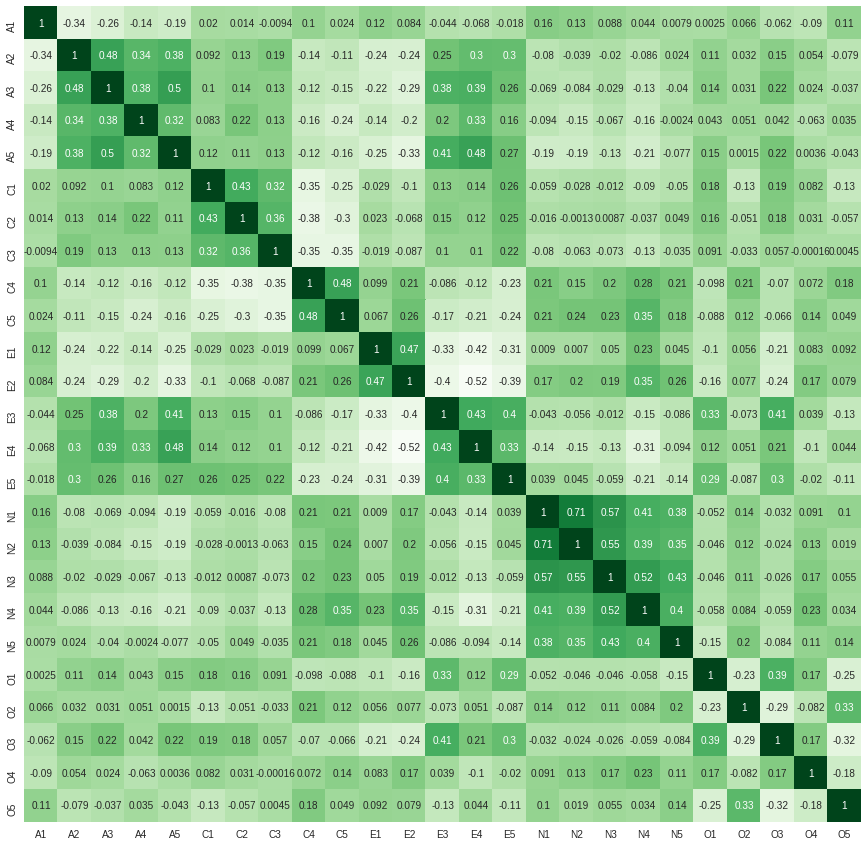

In [17]:
corr_mat = df_factores.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat, cmap='Greens', annot=True, cbar=False);

#### Comentarios sobre los principales patrones de correlación entre las preguntas de la batería.

En un primer grupo, se observa la existencia de correlaciones positivas relevantes entre las preguntas A2, A3, A4 y A5 (vinculadas a la categoría Amabilidad).

En otro grupo, se observa la existencia de correlaciones positivas relevantes entre las preguntas C2, C2 y C3 (vinculadas a la categoría Escrupolisidad). También se observa correlaciones relevantes entre las preguntas C4 y C5.

En otro grupo, se observa la existencia de correlaciones positivas relevantes entre las preguntas E3, E4 y E5 (vinculadas a la categoría Extroversión). También se observa correlaciones relevantes entre las preguntas E1 y E2.

En otro grupo, se observa la existencia de correlaciones positivas relevantes entre las preguntas N1, N2, N3, N4 y N5 (vinculadas a la categoría Neuroticismo). Este grupo es el que presenta los mayores valores de correlación (0.71 entre N1 y N2 y 0.57 entre N1 y N3).

También se observan algunos grupos (manchones) con correlaciones negativas relevantes.

Uno de estos grupo se observa entre las preguntas C4 y C5 con las preguntas C1, C2 y C3.

Otro de estos grupos se observa entre las preguntas E1 y E2 con las preguntas  E3, E4 y E5.



### 4. Extracción de factores.

* Antes de iniciar la extracción de factores, inspeccione la ideonidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esferacidad de Barlett y Kaiser-Meyer-Olkin. Comente los resultados.
* Instancie un objeto con `FactorAnalyzer()` donde se estimen 10 dimensiones latentes y no se aplique rotación.
* Genere un screen plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.
* Refactorice el objeto con `FactorAnalyzer()` para incluir la cantidad de dimensiones válidas que informó el scree plot. 
* Extraiga las cargas $\lambda$ del modelo e identifique qué items están asociados a cada factor. 
  Comente sobre qué significa cada factor construído.
* Extraiga los puntajes del modelo factorial a su base de datos.
* Grafique la densidad de cada uno con `kdplot`.
* Genere dataframe con puntajes y variables demográficas.

In [18]:
# Prueba de esferacidad de errores de Bartlett
fact.calculate_bartlett_sphericity(df_factores)

(16484.78165416042, 0.0)

El análisis de esferacidad de Barlett sugiere que la matriz de correlaciones no es igual a la matriz de identidad (p-value =0), por lo que se puede seguir con el análisis.

In [19]:
# Prueba de muestreo Kaiser-Meyer-Olkin (KMO)
fact.calculate_kmo(df_factores)

(         KMO
 A1  0.738005
 A2  0.834387
 A3  0.871681
 A4  0.870525
 A5  0.900699
 C1  0.838225
 C2  0.788569
 C3  0.849578
 C4  0.823776
 C5  0.861994
 E1  0.841634
 E2  0.883987
 E3  0.893156
 E4  0.878282
 E5  0.894127
 N1  0.778281
 N2  0.778607
 N3  0.860167
 N4  0.886345
 N5  0.860604
 O1  0.855123
 O2  0.783962
 O3  0.833868
 O4  0.781271
 O5  0.758213, 0.8469455121781353)

La prueba de muestreo Kaiser-Meyer-Olkin (KMO) entrega que todas las variables presentan valores superiores a 0.7, por lo que se puede proseguir con el análisis considerando todas las variables.

#### Instanciar un objeto con FactorAnalyzer() estimando 10 dimensiones latentes y sin rotación.

In [20]:
# Generación de una nueva instancia en el objeto factorize
factorize = fact.FactorAnalyzer()
# Implementación del análisis
factorize.analyze(data=df_factores, n_factors=10, method='varimax')
# extracción de los eigenvalues 
factor_screeplot = factorize.get_eigenvalues()[0]

#### Generación scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.

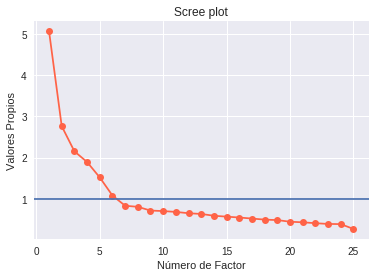

In [21]:
# Gráfico de los eigenvalues vs la cantidad de dimensiones estimables
plt.plot(factor_screeplot.index + 1, factor_screeplot.values, 'o-', color='tomato')
plt.xlabel('Número de Factor')
plt.ylabel('Valores Propios')
# visualización del criterio de corte
plt.axhline(1)
plt.title("Scree plot");

In [22]:
factor_screeplot

,Original_Eigenvalues
0,5.068516
1,2.762479
2,2.152623
3,1.892333
4,1.517533
5,1.078829
6,0.830906
7,0.804500
8,0.714088
9,0.701538


#### Refactorización del objeto con FactorAnalyzer() para incluir la cantidad de dimensiones válidas que informó el scree plot.

En este caso se consideran 5 dimensiones para la refactorización

In [23]:
factorize = fact.FactorAnalyzer()
factorize.analyze(data=df_factores, n_factors=5, method='varimax')


#### Extracción de las cargas  λ  del modelo e identificación de items asociados a cada factor. 

In [24]:
factor_loadings = factorize.loadings
factor_loadings

,Factor1,Factor2,Factor3,Factor4,Factor5
A1,0.116593,0.149412,0.068191,-0.075617,-0.451705
A2,0.130895,0.049023,0.072670,-0.011234,0.587349
A3,0.243638,0.036805,0.021319,-0.014470,0.603462
A4,0.112788,-0.026504,0.186193,-0.185005,0.408451
A5,0.323873,-0.085975,-0.024192,0.004120,0.484016
C1,-0.038014,0.078560,0.564973,0.161000,-0.025636
C2,-0.107284,0.155952,0.690145,0.044214,0.058758
C3,-0.088519,0.025665,0.598839,-0.056700,0.065734
C4,0.062198,0.175909,-0.644196,-0.054569,0.032090
C5,-0.069523,0.202749,-0.557100,0.086478,0.031139


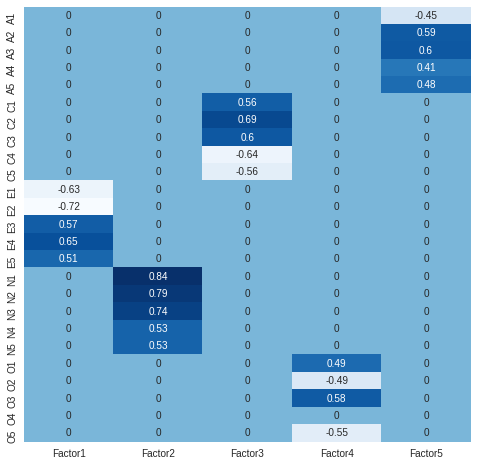

In [25]:
df2=factor_loadings.applymap(lambda x: np.where(abs(x) < .4, 0, round(x, 2)))
plt.figure(figsize=(8,8))
sns.heatmap(df2, cmap='Blues', annot=True, cbar=False);

#### Comentarios sobre cada factor construído.

Se observa que cada factor está asociado a una categoría específica de características.

- El Factor 1 está asociado a preguntas relacionadas con Extroversión (E1, E2, E3, E4 y E5).
- El Factor 2 está asociado a preguntas relacionadas con Neuroticismo (N1, N2, N3, N4 y N5).
- El Factor 3 está asociado a preguntas relacionadas con Escrupolisidad (C1,C2, C3, C4 y C5).
- El Factor 4 está asociado a preguntas relacionadas con Apertura (O1, O2,O3 y O5). 
- El Factor 5 está asociado a preguntas relacionadas con Amabilidad (A1, A2, A3, A4y A5).


#### Extracción de los puntajes del modelo factorial.

In [26]:
extract_factor_scores = factorize.get_scores(df_factores)

In [27]:
extract_factor_scores.head()

,Factor1,Factor2,Factor3,Factor4,Factor5
0,1.243678,0.026460,1.424903,0.399940,0.150827
1,-1.825678,0.578436,-1.283249,-0.574451,-2.160638
2,0.199390,-0.166390,-0.180774,-0.347959,-0.103883
3,-0.093278,-0.493823,0.544909,-0.285536,-1.640317
4,0.190778,-0.869320,-1.337657,0.304891,0.637236


#### Gráfico con la densidad de cada factor

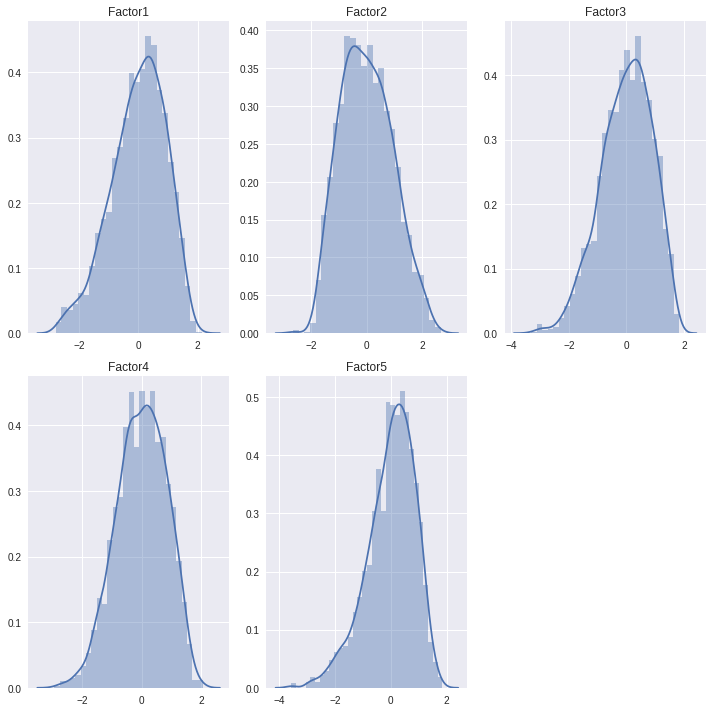

In [28]:
plt.figure(figsize=(10,10))
for index, value in enumerate(extract_factor_scores):
    plt.subplot(2, 3, index + 1)
    plt.title(value)
    sns.distplot(extract_factor_scores.loc[:, value], axlabel=False)
    plt.tight_layout()

In [29]:
# Base de datos con factores y características demográficas
df_final= pd.concat([df_demo,extract_factor_scores], axis=1)

In [30]:
df_final.head(15)

,gender,education,age,Factor1,Factor2,Factor3,Factor4,Factor5
0,2,3.0,21,1.243678,0.026460,1.424903,0.399940,0.150827
1,1,2.0,19,-1.825678,0.578436,-1.283249,-0.574451,-2.160638
2,1,1.0,21,0.199390,-0.166390,-0.180774,-0.347959,-0.103883
3,1,1.0,17,-0.093278,-0.493823,0.544909,-0.285536,-1.640317
4,1,5.0,68,0.190778,-0.869320,-1.337657,0.304891,0.637236
5,2,2.0,27,0.376530,1.146227,-0.190654,0.838218,1.036258
6,1,1.0,18,0.958637,-0.763517,1.063936,0.642675,0.014662
7,2,3.0,20,1.586762,-1.013932,0.342157,0.358015,0.469587
8,2,5.0,51,-0.337498,0.091215,1.157487,1.331922,-0.719246
9,2,3.0,33,0.394478,-0.560233,-0.245202,-0.220887,-0.724619


In [31]:
df_final.shape

(2236, 8)